# Jupyter Notebook Tutorial 

Roughly, the design idea of ``mdciao`` is that:

* The [CLI](http://proteinformatics.uni-leipzig.de/mdciao/cli_cli/cli_cli.html) offers pre-packaged analysis pipelines that are essentially *one-shot* tools. They are an entry-point for non-experts and do not require any Python scripting knowledge. CLI tools are still highly customizable (check ``mdc_**.py -h`` or ``mdc_examples.py``), but offer **only some** of the ``mdciao``-functionalities.
  
* The [Python API](http://proteinformatics.uni-leipzig.de/mdciao/api/api.html), on the other hand, exposes:
   - **CLI-equivalent** functions via the ``mdciao.cli`` [submodule](http://proteinformatics.uni-leipzig.de/mdciao/cli_cli/cli_cli.html). Here you'll find evertying that the CLI offers, only as regular Python functions. This provides scripting flexibility, with the added value that now input and outputs are *normal* Python objects that can be further manipulated, by ``mdciao`` or any other Python module of your liking.
   - Other **standalone submodules** that the CLI uses *under the hood*, and that the user can access directly for any other scripting purpuse: plotting methods, alignment/sequence methods, nomenclature methods, PDB-methods etc.

* Please note, **THE API IS NOT STABLE YET**, if you are using ``mdciao`` in API mode, we assume you can handle future API changes without much hassle.

For clarity, this notebook loosely follows the same structure as the [Overview](http://proteinformatics.uni-leipzig.de/mdciao/overview.html) section of the ``mdciao``documentation. Other notebooks will follow soon, explaining basic concepts and/or advanced pipelines.

If you want to run this notebook on your own, please download and extract the data from [here](http://proteinformatics.org/mdciao/mdciao_example.zip) first.

In [1]:
from mdciao import cli

## Basic Usage
Now we replicate the CLI command:

```
mdc_neighborhoods.py prot.pdb traj.xtc --residues L394 -nf #nf: don't use fragments`
```

but in API mode. We use the method [cli.residue_neighborhoods](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.residue_neighborhoods.html#mdciao.cli.residue_neighborhoods):

Will compute contact frequencies for :
mdciao_example/traj.xtc
 with a stride of 1 frames
Using method 'None' these fragments were found
fragment      0 with 1044 AAs     LEU4           (   0) -   P0G395           (1043) (0)  resSeq jumps

Will compute neighborhoods for the residues
L394
excluding 4 nearest neighbors

   residue      residx    fragment      resSeq         BW        CGN
    LEU394         353           0        394       None       None

Pre-computing likely neighborhoods by reducing the neighbor-list
to those within 15 Angstrom in the first frame of reference geom
'mdciao_example/prot.pdb':...
done!
From 1035 potential distances, the neighborhoods have been reduced to only 87 potential contacts.
If this number is still too high (i.e. the computation is too slow), consider using a smaller nlist_cutoff_Ang 
Streaming mdciao_example/traj.xtc (nr.   0) with stride  1 in chunks of  10000 frames. Now at chunk nr    0, frames so far    280
#idx   freq      contact       fragm

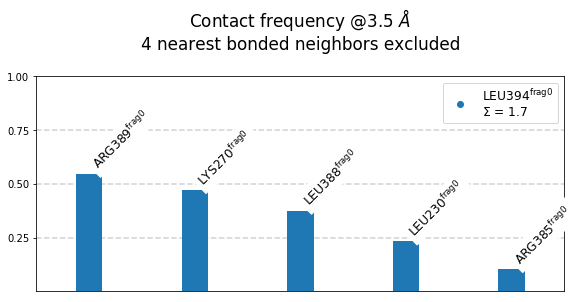

In [2]:
result = cli.residue_neighborhoods("L394",
                                   "mdciao_example/traj.xtc", 
                                   "mdciao_example/prot.pdb", 
                                   fragments=[None])

``result`` is a dictionary of dictionaries, with the main result under the key ``neighborhoods``. There, you'll find a dictionary keyed with residue indices and valued with a [ContactGroup](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup) for each residue neighborhood. 

[ContactGroups](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup) are ``mdciao`` classes that allow the further manipulation of contact data, molecular information and much more. Check here to learn more about ``mdciao`` [classes](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.contacts.html).

In [3]:
result["neighborhoods"]

{353: <mdciao.contacts.contacts.ContactGroup at 0x7f0192b86fd0>}

## Using Python Objects
Please note that in API mode, inputs can be objects, for example ``mdtraj`` [Trajectories](https://mdtraj.org/1.9.4/api/generated/mdtraj.Trajectory.html). So, before calling the next ``mdciao.cli`` method, we use ``mdtraj`` to load the trajectory from our files:

In [4]:
import mdtraj as md
traj = md.load("mdciao_example/traj.xtc", top="mdciao_example/prot.pdb")
traj

<mdtraj.Trajectory with 280 frames, 8384 atoms, 1044 residues, and unitcells at 0x7f018f6c9f10>

And we repeat the above command using the ``traj`` object. Please note that we're also using the ``no_disk`` option so that no files are written to disk, in case we're only interested in working in memory.

Will compute contact frequencies for :
<mdtraj.Trajectory with 280 frames, 8384 atoms, 1044 residues, and unitcells>
 with a stride of 1 frames
Using method 'None' these fragments were found
fragment      0 with 1044 AAs     LEU4           (   0) -   P0G395           (1043) (0)  resSeq jumps

Will compute neighborhoods for the residues
L394
excluding 4 nearest neighbors

   residue      residx    fragment      resSeq         BW        CGN
    LEU394         353           0        394       None       None

Pre-computing likely neighborhoods by reducing the neighbor-list
to those within 15 Angstrom in the first frame of reference geom
'None':...
done!
From 1035 potential distances, the neighborhoods have been reduced to only 74 potential contacts.
If this number is still too high (i.e. the computation is too slow), consider using a smaller nlist_cutoff_Ang 
Streaming over trajectory object nr.   0 (   280 frames,    280 with stride  1) in chunks of 10000 frames. Now at chunk nr    0, fr

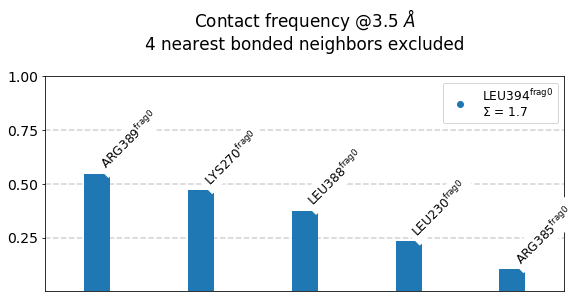

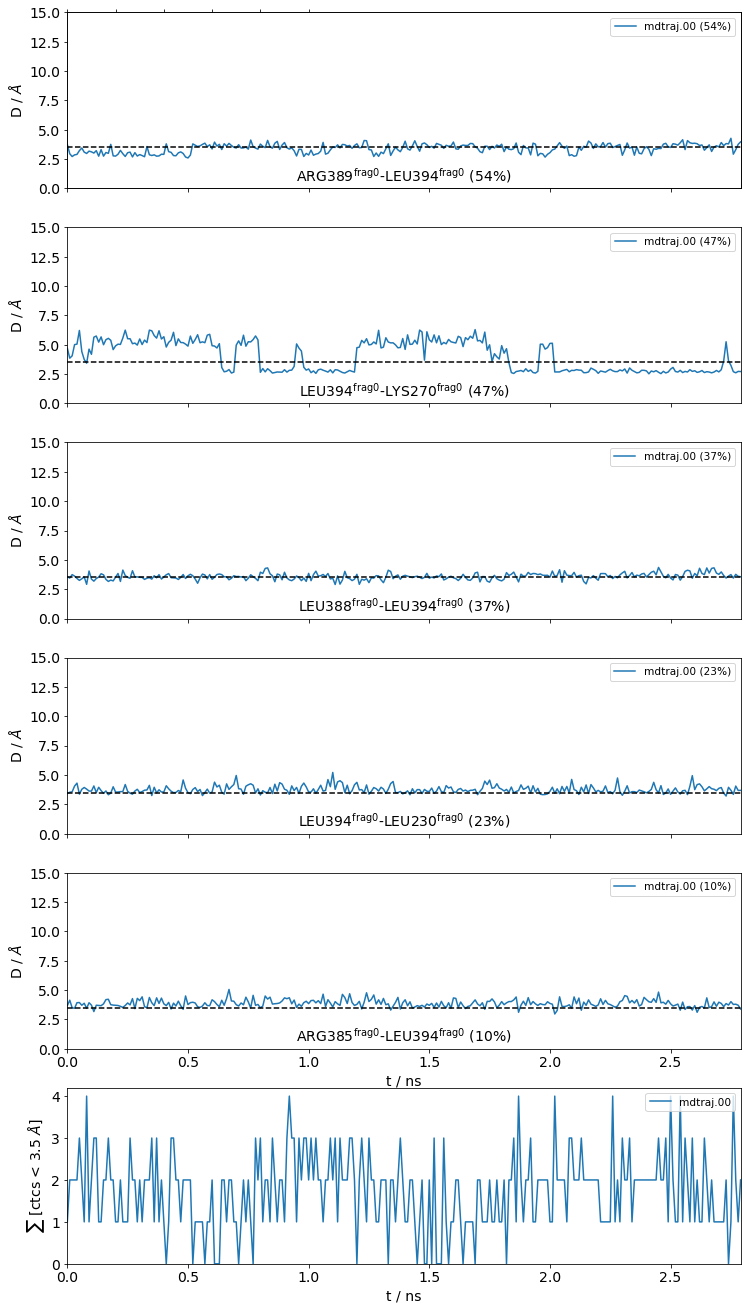

In [5]:
result = cli.residue_neighborhoods("L394",
                                   traj,
                                   fragments=[None],
                                   no_disk=True)

Now, the more elaborated CLI-command:

```
mdc_neighborhoods.py prot.pdb traj.xtc -r L394 --BW adrb2_human --CGN 3SN6 -ni -at #ni: not interactive, at: show atom-types
```

We keep the ``no_disk`` option to avoid writing to disk, but you can change this if you want. **Please note** that some options **do not carry** exactly the same names as their CLI equivalents. E.g. ``ni`` in the CLI (= *don't be interactive*) is now ``accept_guess`` in the API. These differences are needed for compatiblity with other methods, but might get unified in the future. 

Will compute contact frequencies for :
<mdtraj.Trajectory with 280 frames, 8384 atoms, 1044 residues, and unitcells>
 with a stride of 1 frames
Using method 'lig_resSeq+' these fragments were found
fragment      0 with  354 AAs     LEU4           (   0) -   LEU394           (353 ) (0)  resSeq jumps
fragment      1 with  340 AAs     GLN1           ( 354) -   ASN340           (693 ) (1) 
fragment      2 with   66 AAs     ALA2           ( 694) -    PHE67           (759 ) (2) 
fragment      3 with  283 AAs    GLU30           ( 760) -   LEU340           (1042) (3)  resSeq jumps
fragment      4 with    1 AAs   P0G395           (1043) -   P0G395           (1043) (4) 
Using BW-nomenclature, please cite the following 3rd party publications:
 * https://doi.org/10.1016/S1043-9471(05)80049-7 (Weinstein et al 1995)
 * https://doi.org/10.1093/nar/gkx1109 (Gloriam et al 2018)
No local file ./adrb2_human.xlsx found, checking online in
https://gpcrdb.org/services/residues/extended/adrb2_human ...done!


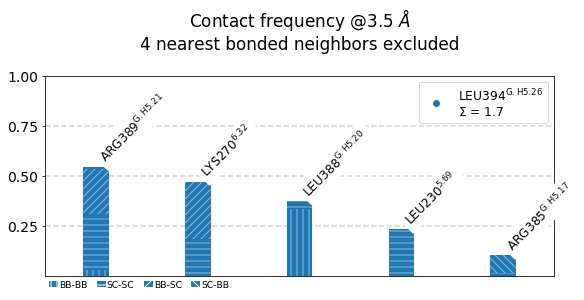

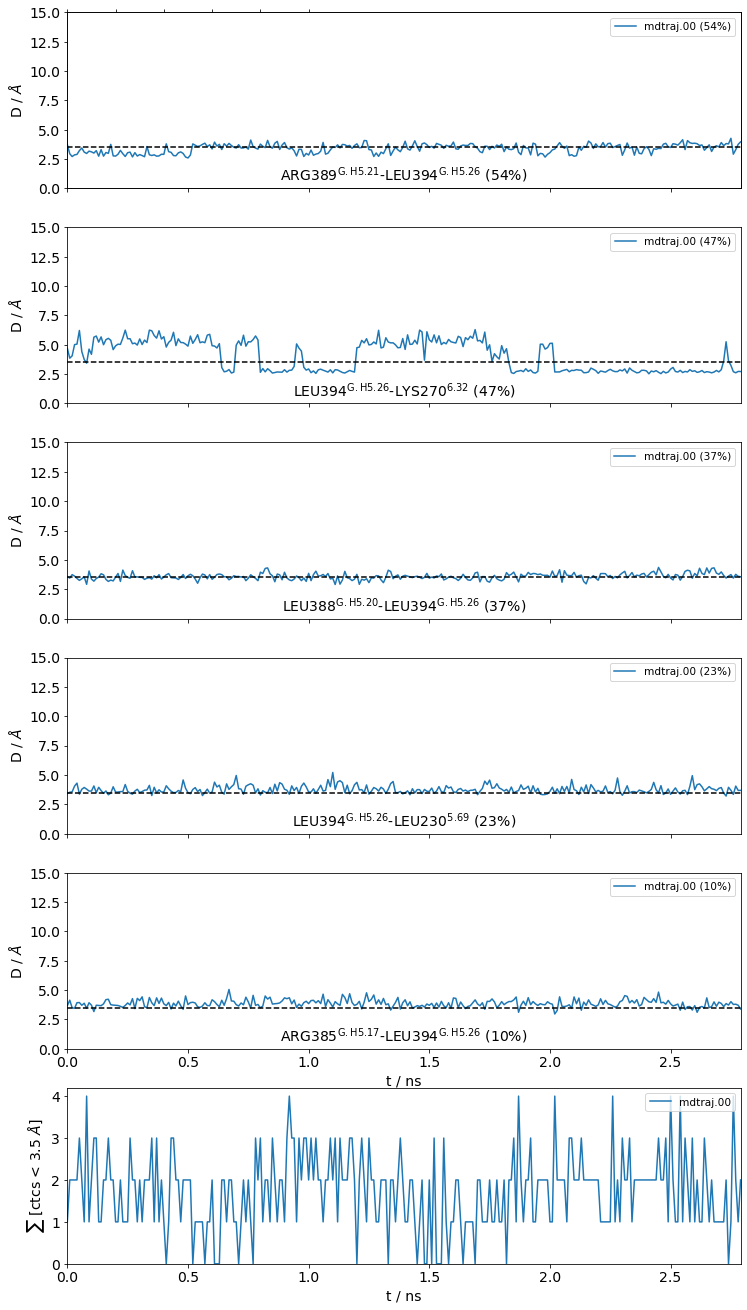

In [6]:
result = cli.residue_neighborhoods("L394", 
                                   traj, 
                                   BW_uniprot="adrb2_human",
                                   CGN_PDB="3SN6",
                                   accept_guess=True,
                                   plot_atomtypes=True,
                                   no_disk=True
                                  )

## Consensus Nomenclature (BW and/or CGN)
Above, we passed our intention to use [Ballesteros-Weinstein-Numbering (BW)](https://doi.org/10.1016/S1043-9471(05)80049-7) and [Common G-alpha Numbering (CGN)](https://doi.org/10.1038/nature14663) using the descriptor strings ``adrb2_human`` or ``3SN6``, respectively, to contact the online databases. 

Since we'll be using these labels more than once in the notebook, instead of using the network each time, we can have them as Python objects in memory. Alternatively, it's possible to save the labeling data locally after the first database query. This allows for inspection and re-use of the retrieved data outside the notebook (in a spreadsheet, for example).

For that retrieval and handling of these labels, we use the [module](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.nomenclature.html) ``mdciao.nomenclature``, which offers [classes](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.nomenclature.html#classes) to store and use these objects in memory. These classes are standalone and can do much more than just be inputs to `mdciao.cli` methods. As with any Python class, you can learn a lot about its methods and attributes by using the [tab autocompletion feature of IPython](https://ipython.org/ipython-doc/dev/interactive/tutorial.html#tab-completion). Or you can check [here](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.nomenclature.html) for more ``mdciao`` docs. 

In [7]:
from mdciao import nomenclature
BW = nomenclature.LabelerBW("adrb2_human", 
                            #write_to_disk=True 
                           )
CGN = nomenclature.LabelerCGN("3SN6", 
                             # write_to_disk=True
                             )

Using BW-nomenclature, please cite the following 3rd party publications:
 * https://doi.org/10.1016/S1043-9471(05)80049-7 (Weinstein et al 1995)
 * https://doi.org/10.1093/nar/gkx1109 (Gloriam et al 2018)
No local file ./adrb2_human.xlsx found, checking online in
https://gpcrdb.org/services/residues/extended/adrb2_human ...done!
done without 404, continuing.
Using CGN-nomenclature, please cite the following 3rd party publications:
 * https://doi.org/10.1038/nature14663 (Babu et al 2015)
No local file ./CGN_3SN6.txt found, checking online in
https://www.mrc-lmb.cam.ac.uk/CGN/lookup_results/3SN6.txt ...done without 404, continuing.
No local PDB file for 3SN6 found in directory '.', checking online in 
https://files.rcsb.org/download/3SN6.pdb ...found! Continuing normally


## Residue Selection
Now, we can play around with residue selection, replicating the CLI-command:

```
mdc_residues.py GLU*,P0G,380-394,G.HN.* prot.pdb --BW adrb2_human --CGN 3SN6 -ni
```

Check the docs [here](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.residue_selection.html) to check the output values `res_idxs_list`,` fragments`, and `consensus_maps`, although most of out useful output is written out.

Please note that we're now using ``mdciao.nomenclature`` classes directly as inputs (``BW`` and ``CGN``), speeding up the method by avoiding queries over the network.

In [8]:
res_idxs_list, fragments, consensus_maps = cli.residue_selection("GLU*,P0G,380-394,G.HN.*",
                                                                 traj,
                                                                 BW_uniprot=BW,
                                                                 CGN_PDB=CGN,
                                                                 accept_guess=True)

Using method 'lig_resSeq+' these fragments were found
fragment      0 with  354 AAs     LEU4           (   0) -   LEU394           (353 ) (0)  resSeq jumps
fragment      1 with  340 AAs     GLN1           ( 354) -   ASN340           (693 ) (1) 
fragment      2 with   66 AAs     ALA2           ( 694) -    PHE67           (759 ) (2) 
fragment      3 with  283 AAs    GLU30           ( 760) -   LEU340           (1042) (3)  resSeq jumps
fragment      4 with    1 AAs   P0G395           (1043) -   P0G395           (1043) (4) 
BW-labels align best with fragments: [3] (first-last: GLU30-LEU340).

These are the BW fragments mapped onto your topology:
    TM1 with   32 AAs    GLU30@1.29      ( 760) -    PHE61@1.60      (791 ) (TM1) 
   ICL1 with    4 AAs    GLU62@12.48     ( 792) -    GLN65@12.51     (795 ) (ICL1) 
    TM2 with   32 AAs    THR66@2.37      ( 796) -    LYS97@2.68      (827 ) (TM2) 
   ECL1 with    4 AAs    MET98@23.49     ( 828) -   PHE101@23.52     (831 ) (ECL1) 
    TM3 with   36

## PDB Queries
Now we grab a structure directly from the PDB, replicating the CLI command:

```
mdc_pdb.py 3SN6 -o 3SN6.gro
```

by using `mdciao.cli.pdb`. Check [here](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.pdb.html#mdciao.cli.pdb) or use the inline docstring for more info. Please note that we're not storing the retrived structure on disk, but rather having it in memory as an ``mdtraj.Trajectory``:

In [9]:
traj3SN6 = cli.pdb("3SN6")
traj3SN6

Checking https://files.rcsb.org/download/3SN6.pdb ...done
Please cite the following 3rd party publication:
 * Crystal structure of the beta2 adrenergic receptor-Gs protein complex
   Rasmussen, S.G. et al., Nature 2011
   https://doi.org/10.1038/nature10361


<mdtraj.Trajectory with 1 frames, 10270 atoms, 1319 residues, and unitcells at 0x7f0192af54d0>

The advantage of this is that now we can use the [awesome nglviewer](https://github.com/nglviewer/nglview/) to 3D-visualize the freshly grabbed structure inside the notebook. 

We need to import the module first, which needs to be installed in your Python environment. If you don't we recommend you [install](https://github.com/nglviewer/nglview/#installation) it via pip:

```
pip install nglview
jupyter-nbextension enable nglview --py --sys-prefix
```

If you don't feel like installing now, you can continue use the notebook. 

In [10]:
try:
    import nglview
    iwd = nglview.show_mdtraj(traj3SN6)
except ImportError:
    iwd = None
iwd


_ColormakerRegistry()

NGLWidget()

## Fragmentation Heuristics
Now we go to fragmentation heuristics, replicating the CLI command:

```
mdc_fragments.py prot.pdb
```

by using the cli.fragments method. Check [here](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.fragment_overview.html#mdciao.cli.fragment_overview) or the inline docstring for more info.


In [11]:
cli.fragment_overview(traj3SN6.top)

Auto-detected fragments with method 'chains'
fragment      0 with  349 AAs     THR9           (   0) -   LEU394           (348 ) (0)  resSeq jumps
fragment      1 with  340 AAs     GLN1           ( 349) -   ASN340           (688 ) (1) 
fragment      2 with   58 AAs     ASN5           ( 689) -    ARG62           (746 ) (2) 
fragment      3 with  443 AAs  ASN1002           ( 747) -   CYS341           (1189) (3)  resSeq jumps
fragment      4 with  128 AAs     GLN1           (1190) -   SER128           (1317) (4) 
fragment      5 with    1 AAs  P0G1601           (1318) -  P0G1601           (1318) (5) 

Auto-detected fragments with method 'resSeq'
fragment      0 with   51 AAs     THR9           (   0) -    GLN59           (50  ) (0) 
fragment      1 with  115 AAs    LYS88           (  51) -   VAL202           (165 ) (1) 
fragment      2 with   51 AAs   SER205           ( 166) -   MET255           (216 ) (2) 
fragment      3 with  132 AAs   THR263           ( 217) -   LEU394           (348 

## Interfaces
Now we move to a more elaborate command:

```
mdc_interface.py prot.pdb traj.xtc -fg1 0 -fg2 3 --BW adrb2_human --CGN 3SN6 -t "3SN6 beta2AR-Galpha interface" -ni
```

and replicate it using ``cli.interface``. Check the docs [here](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.interface.html#mdciao.cli.interface) or in the method's docstring.

Will compute contact frequencies for trajectories:
<mdtraj.Trajectory with 280 frames, 8384 atoms, 1044 residues, and unitcells>
 with a stride of 1 frames
Using method 'lig_resSeq+' these fragments were found
fragment      0 with  354 AAs     LEU4           (   0) -   LEU394           (353 ) (0)  resSeq jumps
fragment      1 with  340 AAs     GLN1           ( 354) -   ASN340           (693 ) (1) 
fragment      2 with   66 AAs     ALA2           ( 694) -    PHE67           (759 ) (2) 
fragment      3 with  283 AAs    GLU30           ( 760) -   LEU340           (1042) (3)  resSeq jumps
fragment      4 with    1 AAs   P0G395           (1043) -   P0G395           (1043) (4) 
BW-labels align best with fragments: [3] (first-last: GLU30-LEU340).

These are the BW fragments mapped onto your topology:
    TM1 with   32 AAs    GLU30@1.29      ( 760) -    PHE61@1.60      (791 ) (TM1) 
   ICL1 with    4 AAs    GLU62@12.48     ( 792) -    GLN65@12.51     (795 ) (ICL1) 
    TM2 with   32 AAs    THR

  0%|          | 0/1 [00:00<?, ?it/s]

done!

From 100182 potential group_1-group_2 distances, the interface was reduced to only 20307 potential contacts.
If this number is still too high (i.e. the computation is too slow) consider using a smaller interface cutoff



100%|██████████| 1/1 [00:08<00:00,  8.09s/it]


These 20 contacts capture 12.03 (~77%) of the total frequency 15.52 (over 20307 contacts)
As orientation value, the first 31 ctcs already capture 90.0% of 15.52.
The 31-th contact has a frequency of 0.14


    freq                         label residue idxs    sum
0   1.00   D381@frag0      - Q229@5.68      340 956   1.00
1   1.00   R385@frag0      - Q229@5.68      344 956   2.00
2   1.00   D381@frag0      - K232@5.71      340 959   3.00
3   0.98   Q384@frag0      - I135@3.54      343 865   3.98
4   0.96   T350@frag0      - R239@ICL3      309 966   4.93
5   0.85   E392@frag0      - T274@6.36      351 976   5.79
6   0.68   Q384@frag0      - Q229@5.68      343 956   6.46
7   0.64   H387@frag0      - A134@3.53      346 864   7.10
8   0.57   Y391@frag0      - T274@6.36      350 976   7.67
9   0.55   Y358@frag0      - E237@5.76      317 964   8.22
10  0.49   R385@frag0      - K232@5.71      344 959   8.71
11  0.47   L394@frag0      - K270@6.32      353 972   9.19
12  0.46   Y358@frag0      

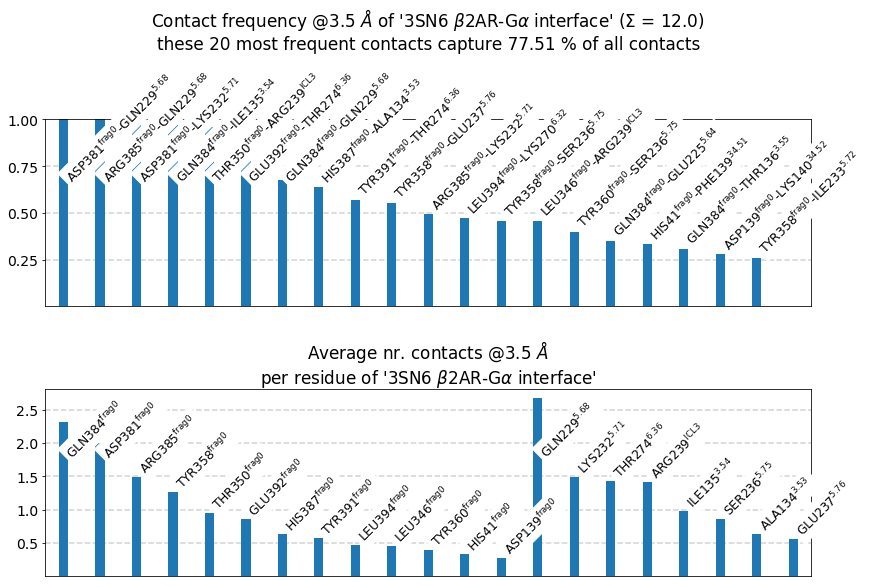

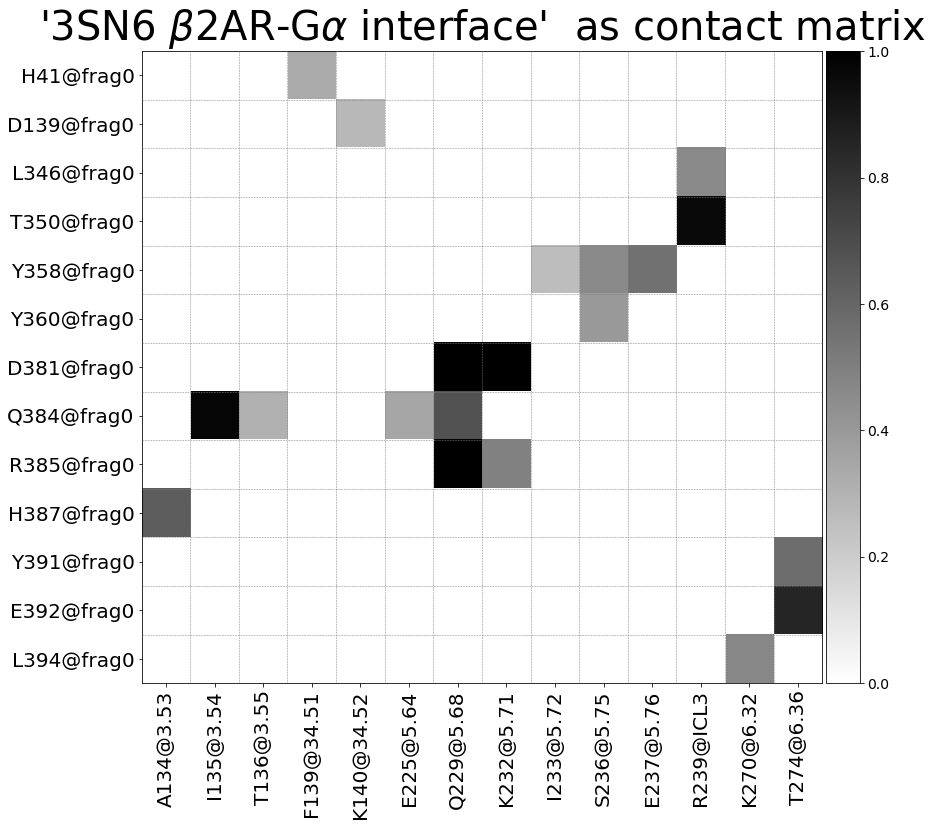

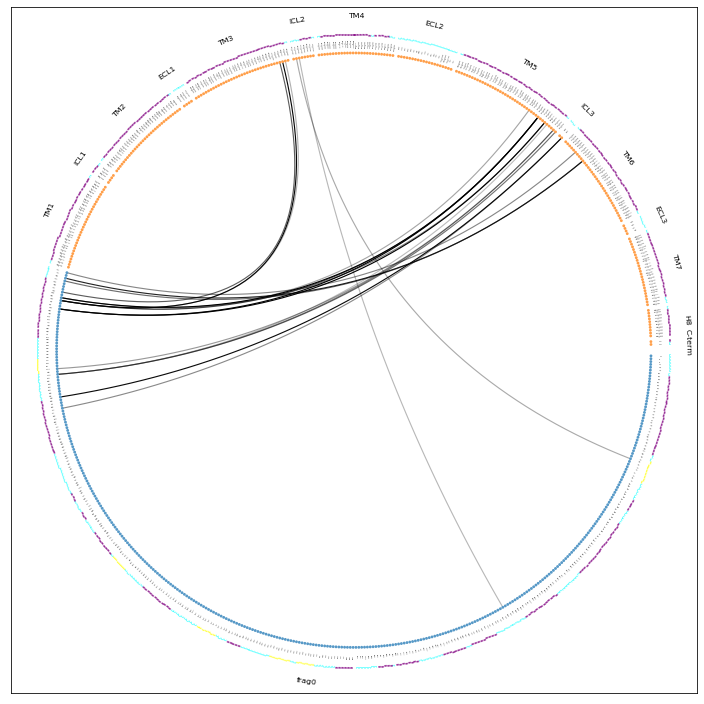

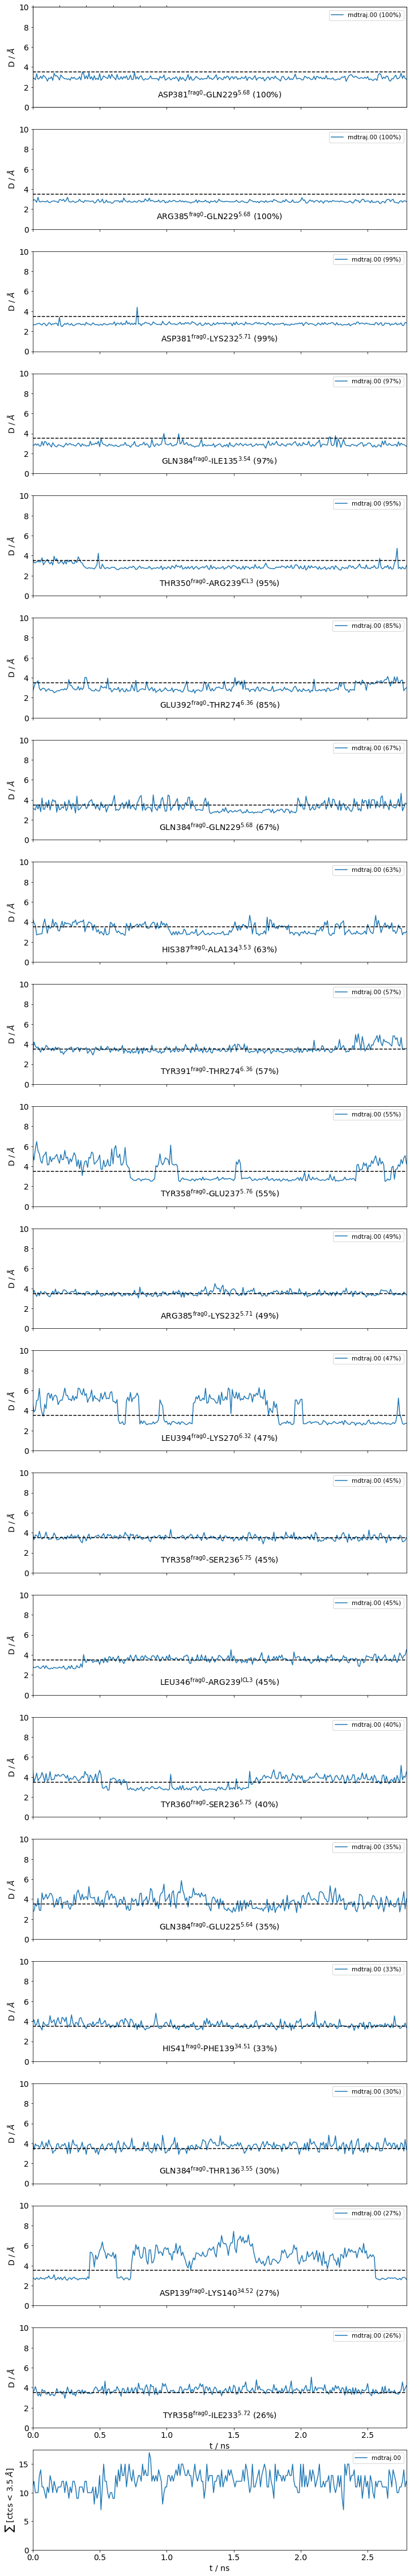

In [12]:
cli.interface(traj, frag_idxs_group_1=[0], frag_idxs_group_2=[3], 
              BW_uniprot=BW, 
              CGN_PDB=BW, 
              title="3SN6 beta2AR-Galpha interface",
              accept_guess=True,
              no_disk=True)

## Sites
Now we use a different approach. Instead of letting ``mdciao`` discover contacts automatically, we list them beforehand as ``site`` dictionaries, and feed this dictionaries to directly to the [method](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.sites.html) ``cli.sites``. The CLI command we're replicating is:

```
mdc_sites.py prot.pdb traj.xtc --site tip.json -at -nf -sa #sa: short AA-names
```

However, in the API-spirit, we're not even using a file on disk to define the ``site``, but create it on the fly as a Python dictionary:

In [13]:
my_site = {
    "name":"interface small",
    "bonds": {"AAresSeq": [
        "L394-K270",
        "D381-Q229",
        "Q384-Q229",
        "R385-Q229",
        "D381-K232",
        "Q384-I135"
        ]}}

Will compute the sites
 site dict with name interface small
in the trajectories:
<mdtraj.Trajectory with 280 frames, 8384 atoms, 1044 residues, and unitcells>
 with a stride of 1 frames.

Using method 'None' these fragments were found
fragment      0 with 1044 AAs     LEU4           (   0) -   P0G395           (1043) (0)  resSeq jumps
   residue      residx    fragment      resSeq         BW        CGN
    ASP381         340           0        340       None       None
    GLN384         343           0        343       None       None
    ARG385         344           0        344       None       None
    LEU394         353           0        353       None       None
    ILE135         865           0        865       None       None
    GLN229         956           0        956       None       None
    LYS232         959           0        959       None       None
    LYS270         972           0        972       None       None
Streaming over trajectory object nr.   0 (   280 f

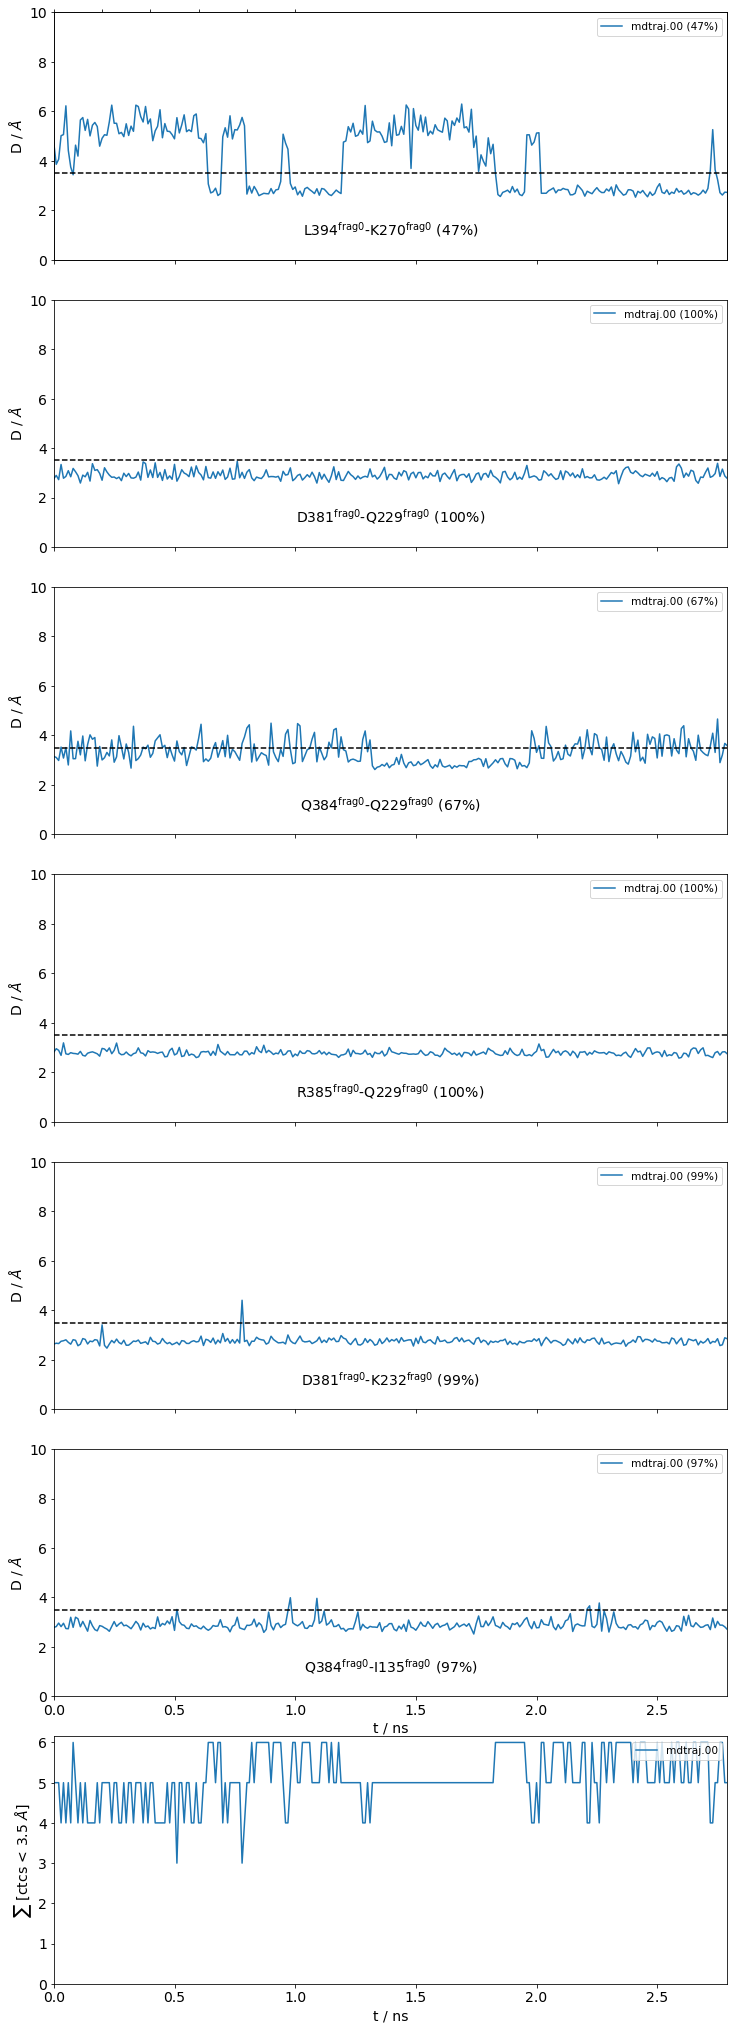

In [14]:
sites = cli.sites([my_site], traj, no_disk=True, plot_atomtypes=True, 
                  fragments=[None], 
                  short_AA_names=True)

The return value ``sites`` is a dictionary keyed with the site names (``interface small`` in this case) and valued with ``mdciao's`` [ContactGroup](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup)-objects.

In [15]:
sites

{'interface small': <mdciao.contacts.contacts.ContactGroup at 0x7f017bca4b90>}

## Contact Groups
The [ContactGroup](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup) class is at the center of ``mdciao`` and offers extensive of manipulation through it's methods. A helpful analogy would be that, what the [Trajectory](https://mdtraj.org/1.9.4/api/generated/mdtraj.Trajectory.html) is to ``mdtraj``, the [ContactGroup](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup) is to ``mdciao``. Both classes:
 
 * store a lot of organized information for further use
 * have attributes and methods that can be used standalone
 * can themselves be the input for other methods (of ``mdtraj`` and ``mdciao``, respectively). 
 * are rarely created from scratch, but rather generated by the module itself.

The best way to learn about the [ContactGroup](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup) is to inspect it with the autocomplete feature if IPython and check the informative names of the attributes and methods.

If you're in a hurry, ``mdciao`` offers a quick way to generate a [ContactGroup](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup) to play around with and investigate it's methods and attributes:

In [16]:
from mdciao import examples
CG = examples.ContactGroupL394()

However, instead of using ``CG`` now, we go back to object ``sites`` that resulted from using ``cli.sites`` above. The returned ``sites``-object is a dictionary keyed with site names (you can compute different sites simultaneously) and valued with [ContactGroups](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup). In our case (check above) we called it it *interface small*

In [17]:
mysite = sites["interface small"]

We use the class's method [plot_freqs_as_bars](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.plot_freqs_as_bars) to produce the now familiar neighborhood plots:

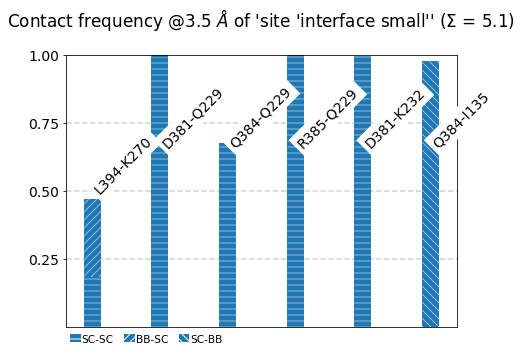

In [18]:
mysite.plot_freqs_as_bars(3.5, 
                          shorten_AAs=True, 
                          defrag="@", 
                          atom_types=True);

It is also very useful to inspect the residue-residue distances of any [ContactGroup](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup) by looking at their **overall distributions** instead of their frequencies, since the hard cutoffs can sometimes hide part of the story:

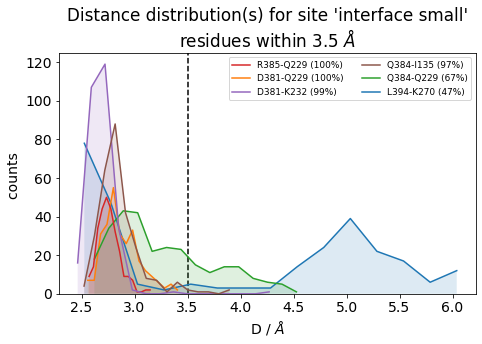

In [19]:
jax = mysite.plot_distance_distributions(bins=15,
                                         defrag="@",
                                         ctc_cutoff_Ang=3.5
                                        )

Please note that, because the example dataset is quite small (280 frames and 2.8 ns), the curves aren't very smooth. Real data will look better.

## Comparisons Between Contact Groups
Finally, we replicate the CLI comand

```
mdc_compare.py 3SN6.X.ARG131@4.0_Ang.dat 3SN6.MD.ARG131@4.0_Ang.dat -k Xray,MD -t "3SN6 cutoff 4AA" -a R131
```

in API mode. This looks different because most of the inputs will now be Python objects in memory.

First, we create the *Xray* and the *MD* ContactGroups separately:

In [20]:
R131_Xray = cli.residue_neighborhoods("R131",traj3SN6, 
                                      ctc_cutoff_Ang=4,
                                      no_disk=True,
                                      BW_uniprot=BW,
                                      figures=False,
                                      CGN_PDB=CGN,accept_guess=True)["neighborhoods"];

Will compute contact frequencies for :
<mdtraj.Trajectory with 1 frames, 10270 atoms, 1319 residues, and unitcells>
 with a stride of 1 frames
Using method 'lig_resSeq+' these fragments were found
fragment      0 with  349 AAs     THR9           (   0) -   LEU394           (348 ) (0)  resSeq jumps
fragment      1 with  340 AAs     GLN1           ( 349) -   ASN340           (688 ) (1) 
fragment      2 with  217 AAs     ASN5           ( 689) -  ALA1160           (905 ) (2)  resSeq jumps
fragment      3 with  284 AAs    GLU30           ( 906) -   CYS341           (1189) (3)  resSeq jumps
fragment      4 with  128 AAs     GLN1           (1190) -   SER128           (1317) (4) 
fragment      5 with    1 AAs  P0G1601           (1318) -  P0G1601           (1318) (5) 
BW-labels align best with fragments: [3] (first-last: GLU30-CYS341).

These are the BW fragments mapped onto your topology:
    TM1 with   32 AAs    GLU30@1.29      ( 906) -    PHE61@1.60      (937 ) (TM1) 
   ICL1 with    4 AAs  

In [21]:
R131_MD = cli.residue_neighborhoods("R131",traj, 
                                    ctc_cutoff_Ang=4,
                                    no_disk=True,
                                    BW_uniprot=BW,
                                    figures=False,
                                    CGN_PDB=CGN,accept_guess=True)["neighborhoods"];

Will compute contact frequencies for :
<mdtraj.Trajectory with 280 frames, 8384 atoms, 1044 residues, and unitcells>
 with a stride of 1 frames
Using method 'lig_resSeq+' these fragments were found
fragment      0 with  354 AAs     LEU4           (   0) -   LEU394           (353 ) (0)  resSeq jumps
fragment      1 with  340 AAs     GLN1           ( 354) -   ASN340           (693 ) (1) 
fragment      2 with   66 AAs     ALA2           ( 694) -    PHE67           (759 ) (2) 
fragment      3 with  283 AAs    GLU30           ( 760) -   LEU340           (1042) (3)  resSeq jumps
fragment      4 with    1 AAs   P0G395           (1043) -   P0G395           (1043) (4) 
BW-labels align best with fragments: [3] (first-last: GLU30-LEU340).

These are the BW fragments mapped onto your topology:
    TM1 with   32 AAs    GLU30@1.29      ( 760) -    PHE61@1.60      (791 ) (TM1) 
   ICL1 with    4 AAs    GLU62@12.48     ( 792) -    GLN65@12.51     (795 ) (ICL1) 
    TM2 with   32 AAs    THR66@2.37     

Please note that, because the molecular topologies differ, the residue ``R131`` is has different indices in each topology, namely 1007 in the X-ray crystal, 861 in the MD simulation:

In [22]:
R131_Xray, R131_MD

({1007: <mdciao.contacts.contacts.ContactGroup at 0x7f01925516d0>},
 {861: <mdciao.contacts.contacts.ContactGroup at 0x7f01895a8a50>})

That will frequently be the case when comparing different proteins of the same family, or topologies where not all sub-units have been modelled etc or antying that produces a shift in these indices. 

``mdciao`` *understands* ``R131`` automatically and doesn't ask more questions, as long as there's an obvious ``R131`` candidate. Otherwise the user will be prompted for disambiguation. 

In this case, now we create a dictionary of ContactGroups that represent the R131 in both topologies:

In [23]:
R131 = {
    "Xray": R131_Xray[1007],
    "MD"  : R131_MD[861]
}

Now we can just pass this dictionary to ``cli.compare`` to see their contact frequencies. This module is pretty flexible on inputs and outputs, check the [documentation](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.compare.html#mdciao.cli.compare) to learn more: 

These interactions are not shared:
Y219@5.58
Their cumulative ctc freq is 0.44. 
Created files
freq_comparison.pdf
freq_comparison.xlsx


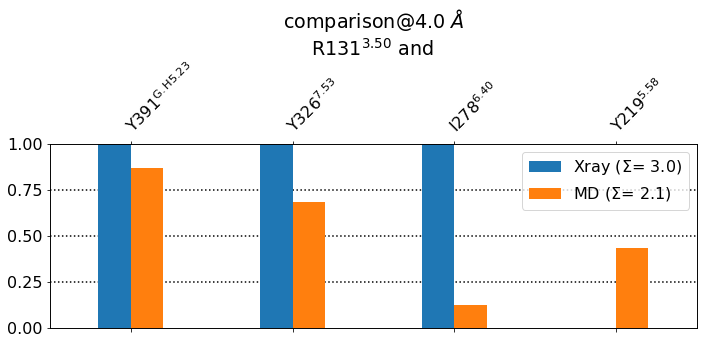

In [24]:
cli.compare(R131, ctc_cutoff_Ang=4, defrag=None, anchor="R131");